#**Ciencia de Datos Aplicada MINE-4101 - TALLER 3**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/University_of_Los_Andes_logo.svg/1200px-University_of_Los_Andes_logo.svg.png" style="width:50px;"> 

Univerisdad de los Andes  
Realizado por: 

  Oscar Fernando Bosigas Puerto – 202220008 - o.bosigas

  Yeimy Andrea Cano M – 202213304 - y.cano

  David Polania Mejia - 202213328 - d.polaniam

# **0. Importación de librerias de trabajo**

Primero se procede a hacer la importación de librerías para poder trabajar con los datos y poder realizar el análisis.

In [717]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [718]:
import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport
import seaborn as sns
from scipy import stats
import scipy
import statsmodels.api as sm

#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures , OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 110    
import pylev

# **Entendimiento del Negocio**




Una empresa del sector farmacéutico desea utilizar la información que posee de sus empleados para estimar el nivel de satisfacción laboral que puedan tener en algún momento y usarlo como insumo para detectar posibles fugas de personal. 

El CEO de la farmacéutica le ha pedido a su equipo de científicos de datos que construyan un modelo para tal fin y le proporcionen un conjunto de estrategias que permitan aumentar el nivel de satisfacción laboral de sus empleados y evitar futuras fugas de personal.

## **a. Objetivos del negocio y situación actual.** 

*   Generar un modelo que permita detectar posibles fugas de personal a partir de los datos de satifacción laboral.


# **Entendimiento de los datos**

A continuación el diccionario de datos entregado por el negocio:

|Modelo|Description|
|---|---|
|Age| Age of the employee|
|Attrition| employee attrition|
|BusinessTravel| how frequently an employee travels for business purpose|
|DailyRate| Daily wage of an employee|
|Department| Employee department|
|DistanceFromHome| Distance from home to office in KM's|
|Education| Qualification of employee (masked, higher is better)|
|EducationField| Stream of Education|
|EmployeeCount| EmployeeCount|
|EmployeeNumber| employee number|
|EnvironmentSatisfaction| Environment (higher is better)|
|Gender| Gender of employee|
|HourlyRate| employee hourly rate|
|JobInvolvement| Job involvement (higher is better)|
|JobLevel| level of Job (higher is more important)|
|JobRole| job role of an employee|
|JobSatisfaction| if employee is satisfied?|
|MaritalStatus| employee is married or not|
|MonthlyIncome| income of an employee|
|MonthlyRate| monthly rate of an employee|
|NumCompaniesWorked| number of companies worked for|
|Over18| age over 18|
|OverTime| employee works over time|
|PercentSalaryHike| salary hike|
|PerformanceRating| performance rate|
|RelationshipSatisfaction| Relationship satisfaction|
|StandardHours| per week standard work hours|
|StockOptionLevel| company stock option level|
|TotalWorkingYears| total working years|
|TrainingTimesLastYears| Training time|
|WorkLifeBalance| Work life balance|
|YearsAtCompany| total years at current company|
|YearsInCurrentRole| total years in current role|
|YearsSinceLastPromotion| years since last promotion|
|YearsWithCurrManager| Years worked under current manager|

De acuero a la descripción de las columnas, la variable objetivo es *'Attrition'*

## **a. Adquisición e integración de datos.**

El archivo de datos está como archivo de CSV, separado por ';'. El archivo se deja en github para poder leer los datos desde ahi:

In [719]:
# Loading data
url = 'https://raw.githubusercontent.com/yacanom/CDA_MINE-4101_repo/main/Taller%203/Data_Taller_3.csv'
data = pd.read_csv(url, sep=';', decimal=",")

Se revisa la estructura de los datos

In [720]:
data.head(10)

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,80.0,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,80.0,1,10,3,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,80.0,0,7,3,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,80.0,0,8,3,3,8,7,3,0,0
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80.0,1,6,3,3,2,2,2,2,0
5,4.0,32.0,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,80.0,0,8,2,2,7,7,3,6,0
6,1.0,59.0,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,...,80.0,3,12,3,2,1,0,0,0,0
7,3.0,30.0,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,...,80.0,1,1,2,3,1,0,0,0,0
8,3.0,38.0,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,...,80.0,0,10,2,3,9,7,1,8,0
9,3.0,36.0,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,...,80.0,2,17,3,2,7,7,7,7,0


## **b. Limpieza y preparación de datos.**

In [721]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   JobSatisfaction           1494 non-null   float64
 1   Age                       1503 non-null   float64
 2   Attrition                 1505 non-null   object 
 3   BusinessTravel            1506 non-null   object 
 4   DailyRate                 1506 non-null   int64  
 5   Department                1506 non-null   object 
 6   DistanceFromHome          1506 non-null   int64  
 7   Education                 1506 non-null   int64  
 8   EducationField            1506 non-null   object 
 9   EmployeeCount             1506 non-null   int64  
 10  EmployeeNumber            1506 non-null   int64  
 11  EnvironmentSatisfaction   1506 non-null   int64  
 12  Gender                    1506 non-null   object 
 13  HourlyRate                1506 non-null   int64  
 14  JobInvol

In [722]:
data.describe()

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
count,1494.000000,1503.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,...,1499.0,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000
mean,2.744311,37.086494,803.978752,9.229084,2.915671,1.000664,753.500000,2.729084,66.280212,2.729084,...,80.0,0.790173,11.220452,2.802789,2.758964,7.041169,4.212483,2.169987,4.112882,0.007968
std,1.099938,10.848391,403.962331,8.135153,1.031172,0.025768,434.889066,1.092854,21.275971,0.717816,...,0.0,0.850911,7.778530,1.293076,0.705698,6.568092,3.618337,3.196186,3.572208,0.088938
min,1.000000,3.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,30.000000,465.000000,2.000000,2.000000,1.000000,377.250000,2.000000,48.000000,2.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,3.000000,36.000000,805.000000,7.000000,3.000000,1.000000,753.500000,3.000000,66.000000,3.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,4.000000,43.000000,1161.000000,14.000000,4.000000,1.000000,1129.750000,4.000000,84.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,4.000000,200.000000,1499.000000,29.000000,7.000000,2.000000,1506.000000,4.000000,190.000000,4.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,100.000000,18.000000,15.000000,17.000000,1.000000


De una primera observación general de los datos se puede indentificar:
  * Se tienen 36 columnas de datos, y 1506 registros.
  * Se tienen 3 tipos de datos: float64(3), int64(24), object(9).
  * Las siguientes columnas tienen datos incompletos: JobSatisfaction(1494), Age(1503), Attrition(1505), y StandardHours (1499).

### JobSatisfaction

In [723]:
#datos vacíos columna JobSatisfaction
data[data['JobSatisfaction'].isnull()]['NewEmployee']

15      1
69      1
129     1
265     1
604     1
739     1
844     1
887     1
907     1
990     1
1161    1
1374    1
Name: NewEmployee, dtype: int64

Como datos vacíos se identificaron los 12 registros (NewEmployee = 1) para evaluar los modelos. Se procede a almacenar éstos datos en un nuevo dataframe para evaluar después, y por ahora quitarlos de los datos.

In [724]:
NewEmployee = data.copy()
NewEmployee = NewEmployee[NewEmployee['JobSatisfaction'].isnull()].drop(['JobSatisfaction'], axis=1)
NewEmployee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
15,29.0,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,16,...,80.0,1,10,1,3,10,9,8,8,1
69,36.0,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,1,70,...,80.0,1,2,0,2,1,0,0,0,1
129,49.0,No,Travel_Rarely,470,Research & Development,20,4,Medical,1,130,...,80.0,0,16,2,2,15,11,5,11,1
265,29.0,No,Travel_Rarely,1210,Sales,2,3,Medical,1,266,...,80.0,2,10,2,3,0,0,0,0,1
604,42.0,No,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,605,...,80.0,1,10,3,2,9,8,7,8,1
739,27.0,No,Travel_Rarely,1055,Research & Development,2,4,Life Sciences,1,740,...,80.0,1,4,2,3,3,2,2,2,1
844,30.0,No,Travel_Rarely,852,Sales,10,3,Marketing,1,845,...,80.0,1,10,3,3,10,3,1,4,1
887,42.0,No,Travel_Frequently,458,Research & Development,26,5,Medical,1,888,...,80.0,0,20,6,3,1,0,0,0,1
907,44.0,No,Travel_Rarely,1099,Sales,5,3,Marketing,1,908,...,80.0,1,26,5,3,22,9,3,10,1
990,33.0,No,Travel_Frequently,1111,Sales,5,1,Life Sciences,1,991,...,80.0,0,8,2,4,5,4,1,2,1


In [725]:
data = data.dropna(subset=['JobSatisfaction'])

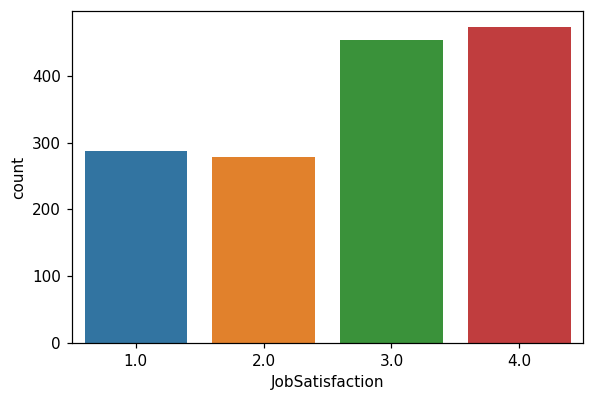

In [726]:
#histograma para ver la distribución
sns.countplot(data=data, x="JobSatisfaction")

Más de un poco del 60% de los datos se concentran entre las categorías 3.0 y 4.0. Evidentemente hay un pequeño desbalanceo para las clases. 

### Age

In [727]:
#datos vacíos columna Age
data[data['Age'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80.0,1,6,3,3,2,2,2,2,0
977,3.0,NaN,No,Non-Travel,999,Research & Development,26,1,Technical Degree,1,...,80.0,3,5,2,3,5,4,0,0,0
1340,3.0,NaN,No,Travel_Rarely,1266,Sales,10,4,Technical Degree,1,...,80.0,1,10,4,3,10,9,1,7,0


In [728]:
#Conocer la estadística descriptiva para entender los datos de AGE
data['Age'].describe()

count    1491.000000
mean       37.078471
std        10.861848
min         3.000000
25%        30.000000
50%        36.000000
75%        43.000000
max       200.000000
Name: Age, dtype: float64

In [729]:
print("mediana",data['Age'].median())
print("media",data['Age'].mean())

mediana 36.0
media 37.0784708249497


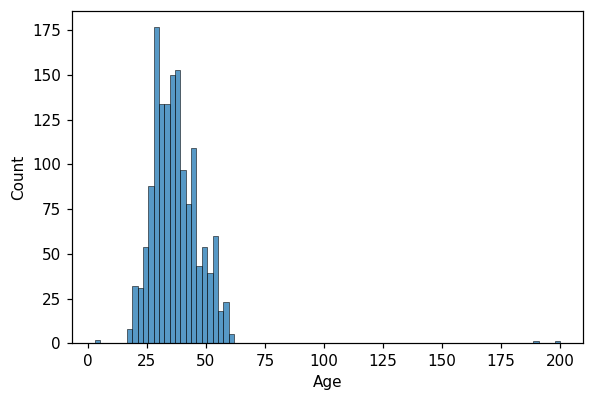

In [730]:
#histograma para ver la distribución
sns.histplot(data=data, x="Age")


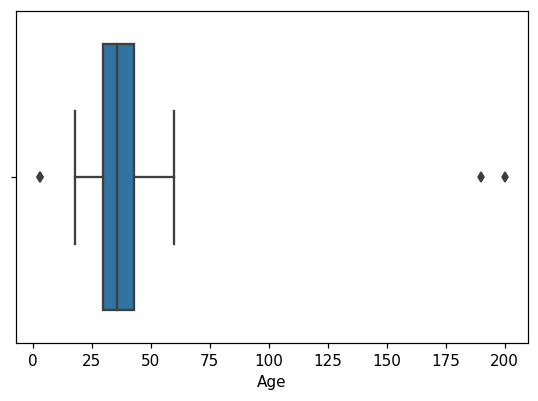

In [731]:
#otra visualización para los datos out
sns.boxplot(x=data["Age"])

In [732]:
data[ (data['Age'] > 75) | (data['Age'] < 18) ].sort_values(by=['Age'])

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
511,2.0,3.0,No,Travel_Rarely,913,Research & Development,9,2,Medical,1,...,80.0,1,13,2,3,3,2,0,2,0
958,4.0,3.0,No,Travel_Rarely,943,Research & Development,9,3,Life Sciences,1,...,80.0,1,10,0,2,9,7,1,6,0
149,2.0,190.0,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,...,80.0,0,1,3,3,1,0,0,0,0
1485,4.0,200.0,No,Travel_Rarely,391,Research & Development,16,2,Life Sciences,1,...,80.0,0,0,6,3,0,0,0,0,0


Se puede observar que para la columna Age (edad) existen valores atípicos: edades de 3 años (no son posibles) y muy superiores (175 y 200 años). Se tiene una mediana 36.0 y una media 37.086, esta última es afectada por los valores superiores por lo que se propone:

*   Imputar los valores pendientes con la mediana (36.0)
*   Interpretar los valores atípicos como un problema de digitación, por lo cual 3 se reemplaza con 30, 190 por 19 y 200 por 20



In [733]:
#imputar datos fataltantes de Age con la mediana:
data['Age'] = data['Age'].fillna(data['Age'].median())
#ajustar los valores atípicos:
data['Age'] = data['Age'].apply(lambda x: 30 if (x==3) else x)
data['Age'] = data['Age'].apply(lambda x: x/10 if (x>100) else x)

### Attrition

In [734]:
#datos vacíos columna Attrition
data[data['Attrition'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
1337,2.0,28.0,NaN,Travel_Rarely,1172,Sales,3,3,Med,1,...,80.0,1,1,3,3,1,0,0,0,0


In [735]:
data['Attrition'].describe()

count     1493
unique       3
top         No
freq      1243
Name: Attrition, dtype: object

In [736]:
data['Attrition'].unique()

array(['Yes', 'No', 'Na', nan], dtype=object)

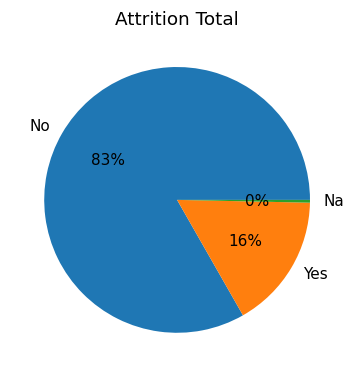

In [737]:
#Ver la distribución de las dos categorías:
df_Attrition = data[{"Attrition", "Age"}].groupby("Attrition").count().sort_values("Age", ascending=False).rename(columns={"Age":"Attrition Total"}).reset_index()

plt.pie(df_Attrition.loc[:,"Attrition Total"], labels = df_Attrition.loc[:, "Attrition"], autopct='%.0f%%')
plt.title('Attrition Total')
plt.show()

In [738]:
df_Attrition

,Attrition,Attrition Total
0,No,1243
1,Yes,245
2,Na,5


Se observa que la moda para la columna Attrition es de “No” (83%) , lo que también nos muestra que los datos están debalanceados. Respecto al dato faltante, se considera imputarlo con el valor de moda “No” (dado que es un solo registro no se espera se afecte considerablemente por esta decisión).

Se infiere que los datos "Na" realmente corresponden a un "No"

In [739]:
#imputar valor nulo de columna Attrition con moda
data['Attrition'] = data['Attrition'].fillna(pd.Series(data['Attrition'].values.flatten()).mode()[0])
#cambiar Na por No en Attrition
data['Attrition'] = data['Attrition'].apply(lambda x: "No" if (x=="Na") else x)

### StandardHours

In [740]:
#datos vacíos columna StandardHours 
data[data['StandardHours'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
396,3.0,43.0,No,Travel_Rarely,1473,Research & Development,8,4,Other,1,...,NaN,0,8,3,3,5,2,0,2,0
491,3.0,43.0,No,Travel_Frequently,1001,Research & Development,9,5,Medical,1,...,NaN,1,10,3,3,8,7,4,7,0
532,1.0,47.0,No,Travel_Rarely,703,Sales,14,4,Marketing,1,...,NaN,0,20,2,3,7,7,1,7,0
992,3.0,39.0,No,Non-Travel,1485,Research & Development,25,2,Life Sciences,1,...,NaN,1,13,2,3,6,4,0,5,0
1112,2.0,38.0,Yes,Travel_Rarely,903,Research & Development,2,3,Med,1,...,NaN,2,7,2,3,5,2,1,4,0
1291,1.0,37.0,Yes,Travel_Rarely,370,Research & Development,10,4,Med,1,...,NaN,0,10,4,1,10,3,0,8,0
1377,4.0,49.0,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,...,NaN,0,28,3,3,5,4,4,3,0


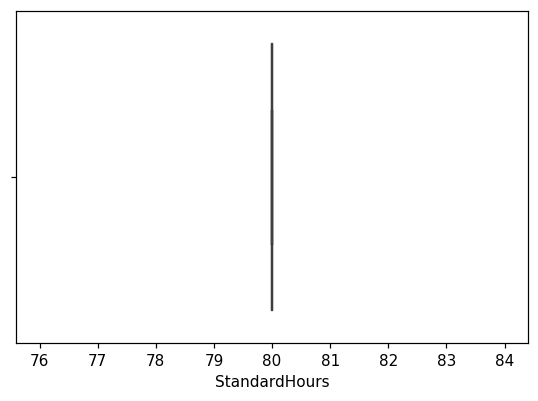

In [741]:
sns.boxplot(x=data["StandardHours"])

In [742]:
data["StandardHours"].describe()

count    1487.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64

Esta columna presenta valor constante en 80, por lo que al imputar los valores nulos se dejan con el mismo valor.

In [743]:
data['StandardHours'] = data['StandardHours'].fillna(data['StandardHours'].median())

Ahora se revisa si las demás columnas tienen algún problema de calidad de datos:

### BusinessTravel

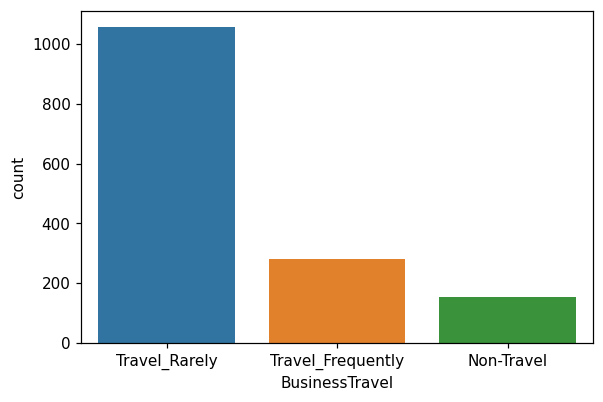

In [744]:
#BusinessTravel
sns.countplot(data=data, x="BusinessTravel")

Se identifica que el valor Travel_Rarely es el más común para los empleados. No se identifican problemas de calidad de datos.

### DailyRate

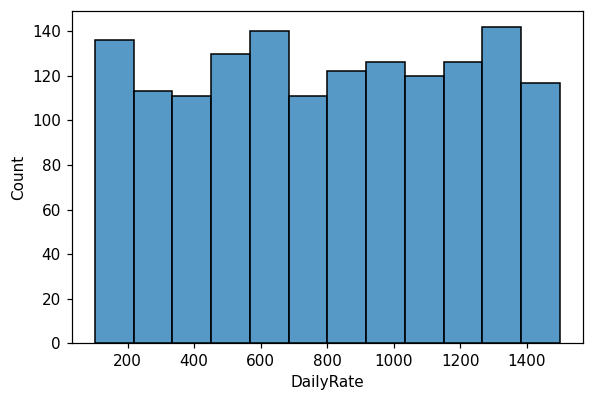

In [745]:
#DailyRate
sns.histplot(data=data, x="DailyRate")

In [746]:
data['DailyRate'].describe()

count    1494.000000
mean      803.811914
std       404.389201
min       102.000000
25%       465.000000
50%       805.000000
75%      1162.000000
max      1499.000000
Name: DailyRate, dtype: float64

In [747]:
print("mediana",data['DailyRate'].median())
print("media",data['DailyRate'].mean())

mediana 805.0
media 803.8119143239625


El valor de salario (DailyRate) se encuentra en números enteros, y no se observan problemas de valores atípicos.

### Department

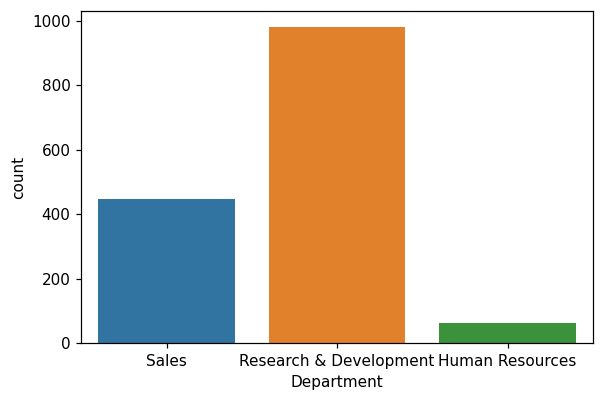

In [748]:
#Department
ax = sns.countplot(data=data, x="Department")

No se identifican problemas con ésta variable categórica.

### DistanceFromHome

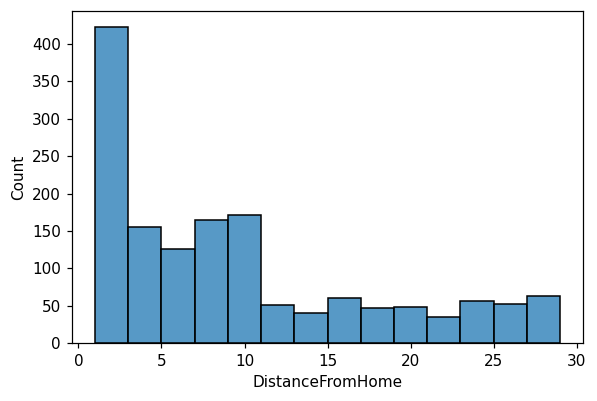

In [749]:
#DistanceFromHome
sns.histplot(data=data, x="DistanceFromHome")

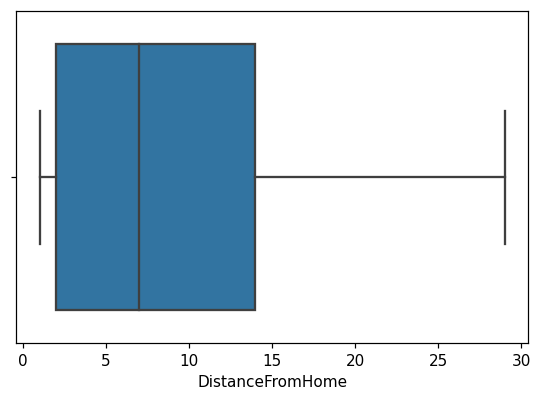

In [750]:
sns.boxplot(x=data["DistanceFromHome"])

In [751]:
data['DistanceFromHome'].describe()

count    1494.000000
mean        9.201473
std         8.115969
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

Respecto a la variable 'DistanceFromHome', el 75 percentil se agrupa en 14 pero dado que los valores mayores no son tan superirores (máximo de 29) no se considera tratar estos datos.

###Education

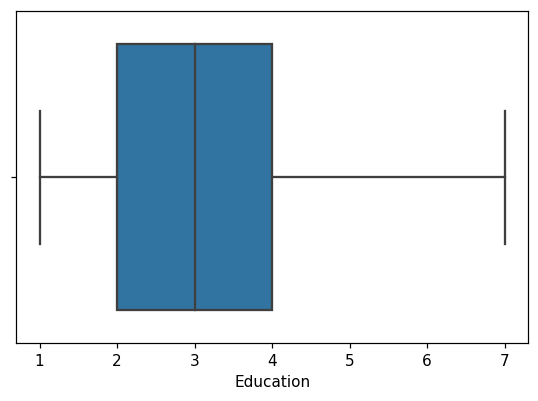

In [752]:
sns.boxplot(x=data["Education"])

Los valores se encuentran entre 1 y 7, de acuerdo al diccionario de datos está enmarada y se entendería que 7 es el grado más alto de educación de un empleado.

###EducationField

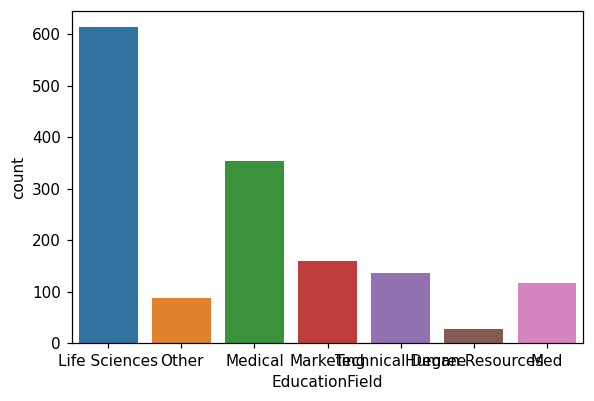

In [753]:
#Columna EducationField
hist  = sns.countplot(data=data, x="EducationField")

In [754]:
data[{"EducationField", "Age"}].groupby("EducationField").count().sort_values("Age", ascending=False).rename(columns={"Age":"EducationField Total"}).reset_index()

,EducationField,EducationField Total
0,Life Sciences,614
1,Medical,353
2,Marketing,159
3,Technical Degree,136
4,Med,117
5,Other,88
6,Human Resources,27


No se observan problemas con esta variable.

###EmployeeCount

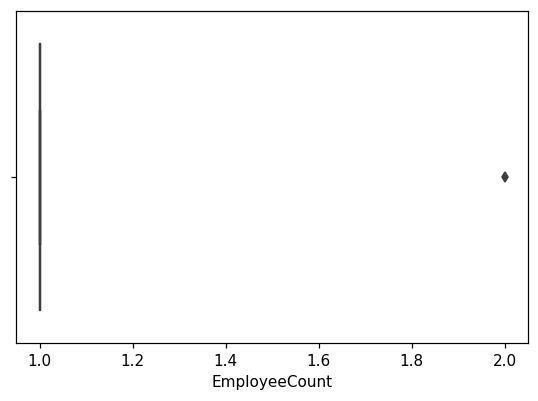

In [755]:
#EmployeeCount
sns.boxplot(x=data["EmployeeCount"])

In [756]:
data[ data['EmployeeCount'] == 2 ]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
351,2.0,32.0,No,Travel_Rarely,1062,Research & Development,2,3,Medical,2,...,80.0,1,8,4,3,8,0,0,7,0


In [757]:
data[ data['EmployeeCount'] == 2 ].at[351 ,'JobRole']

'Laboratory Technician'

Esta columna tiene un único registro en '2.0', que corresponde a un empleado con rol 'Laboratory Technician', se revisaron otros registros con el mismo rol y contenian 1, por lo que se interpreta hubo un error de digitación y se corrige el dato:


In [758]:
data['EmployeeCount'] = data['EmployeeCount'].apply(lambda x: 1 if (x==2) else x)

###EmployeeNumber

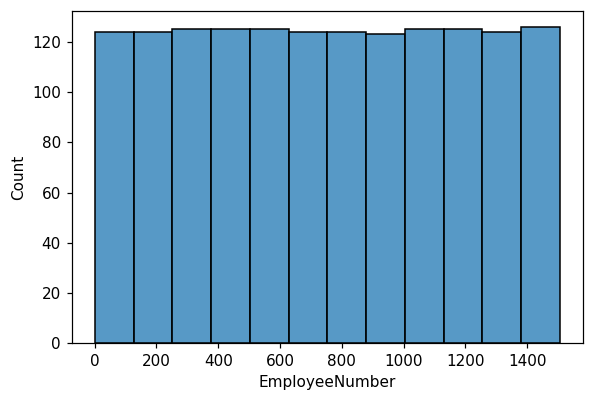

In [759]:
#Columna EmployeeNumber
hist  = sns.histplot(data=data, x="EmployeeNumber")

Tal como se esperaba es un data único para cada uno de lo empleados.

###EnvironmentSatisfaction

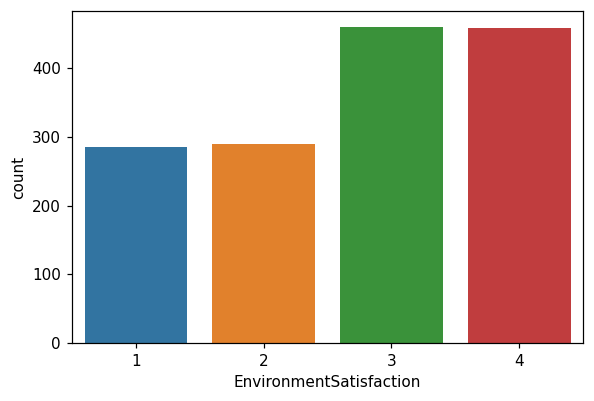

In [760]:
#Columna EnvironmentSatisfaction
hist  = sns.countplot(data=data, x="EnvironmentSatisfaction")

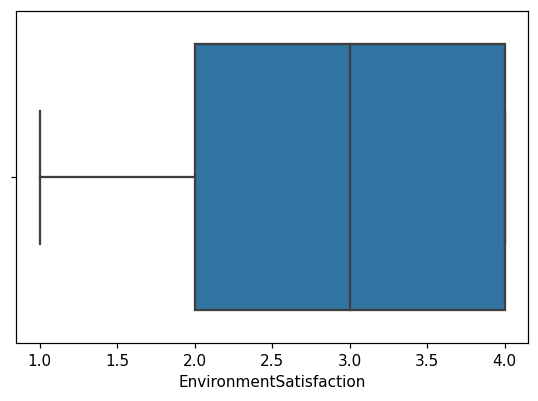

In [761]:
sns.boxplot(x=data["EnvironmentSatisfaction"])

No se encontraron valores atípicos para esta columna.

### Gender

In [762]:
data['Gender'].describe()

count     1494
unique       5
top       Male
freq       724
Name: Gender, dtype: object

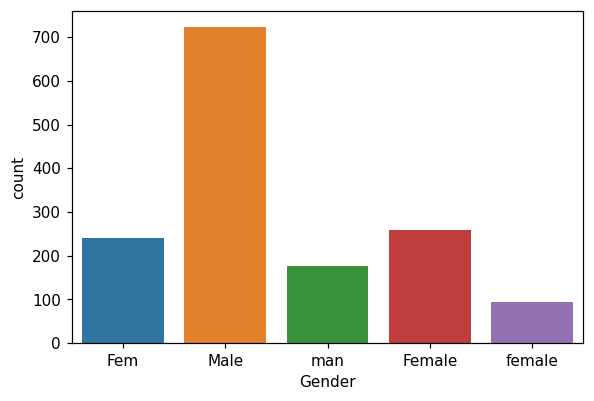

In [763]:
# SNS Barplot of data[Gender]
sns.countplot( data=data, x="Gender")

In [764]:
print(data["Gender"].unique());

['Fem' 'Male' 'man' 'Female' 'female']


In [765]:
# count each category in Gender
print(data["Gender"].value_counts())

Male      724
Female    258
Fem       241
man       177
female     94
Name: Gender, dtype: int64


In [766]:
data["Gender"] = data["Gender"].replace("Fem", "Female")
data["Gender"] = data["Gender"].replace("female", "Female")
data["Gender"] = data["Gender"].replace("man", "Male")

In [767]:
# count each category in Gender
print(data["Gender"].value_counts());

Male      901
Female    593
Name: Gender, dtype: int64


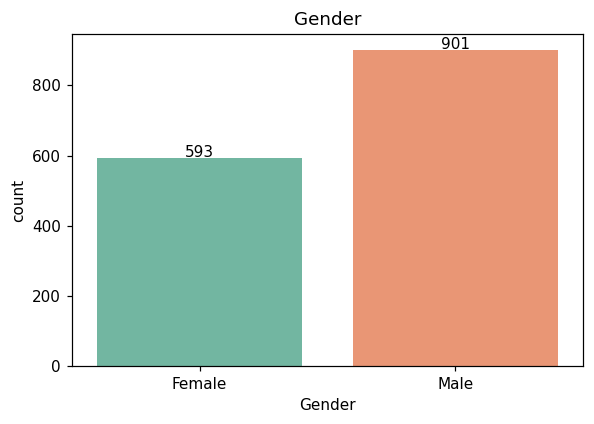

In [768]:
# SNS Barplot of data[Gender]
plt = sns.countplot( data=data, x="Gender", palette="Set2")
plt.set_title("Gender")
#Show total number of observations for each category
for p in plt.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

### HourlyRate

In [769]:
data['HourlyRate'].describe()

count    1494.000000
mean       66.239625
std        21.305550
min        30.000000
25%        48.000000
50%        66.000000
75%        84.000000
max       190.000000
Name: HourlyRate, dtype: float64

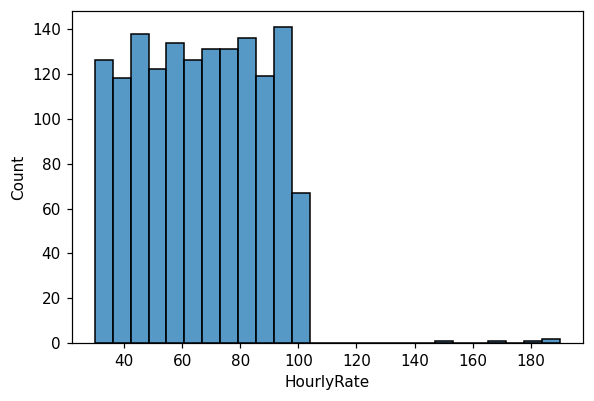

In [770]:
sns.histplot(data=data, x="HourlyRate");

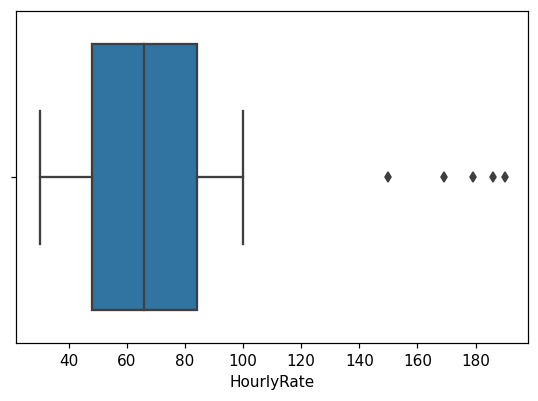

In [771]:
sns.boxplot(x=data["HourlyRate"]);

Es posible que los valores outliers, hayan sido digitados erróneamente, por lo que se propone:

*   Interpretar los valores atípicos como un problema de digitación, por lo cual 140 se reemplaza con 40, 160 por 60 y 180 por 80

In [772]:
# If data in HourlyRate is out of range, substract 100
data.loc[data['HourlyRate'] > 100, 'HourlyRate'] = data['HourlyRate'] - 100

In [773]:
data['HourlyRate'].describe()

count    1494.000000
mean       65.904953
std        20.361510
min        30.000000
25%        48.000000
50%        66.000000
75%        84.000000
max       100.000000
Name: HourlyRate, dtype: float64

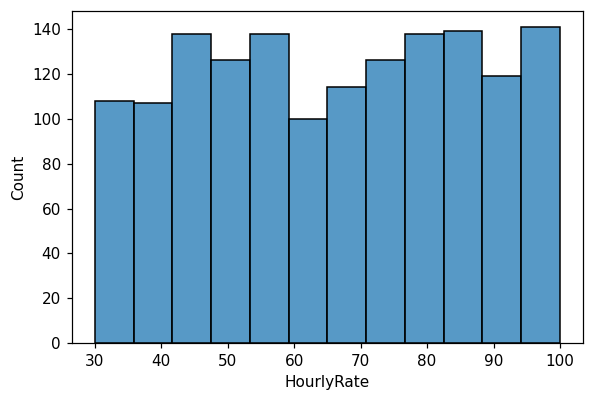

In [774]:
sns.histplot(data=data, x="HourlyRate");

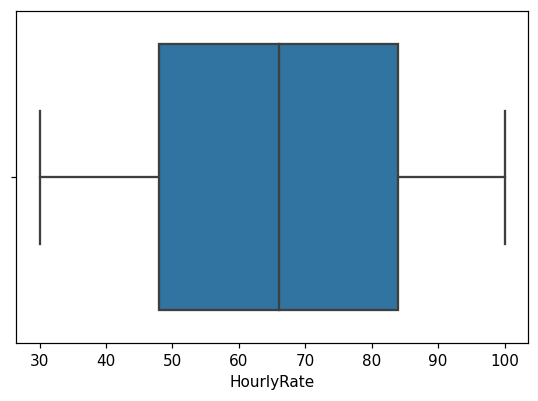

In [775]:
sns.boxplot(x=data["HourlyRate"]);

### JobInvolvement


In [776]:
data['JobInvolvement'].describe()

count    1494.000000
mean        2.728916
std         0.718715
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

In [777]:
print(data["JobInvolvement"].unique());

[3 2 4 1]


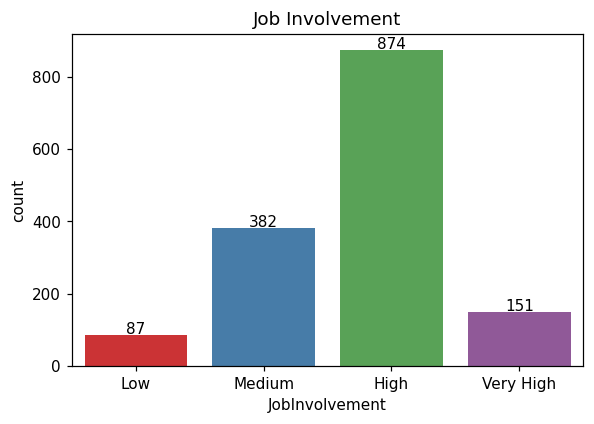

In [778]:
plt = sns.countplot( data=data, x="JobInvolvement", palette="Set1")
plt.set_title("Job Involvement")
#Show total number of observations for each category
for p in plt.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
    
labels = ['Low', 'Medium', 'High', 'Very High']
plt.set_xticklabels(labels);

### JobLevel

In [779]:
# JobLevel
data['JobLevel'].describe()

count    1494.000000
mean        2.050870
std         1.105952
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

In [780]:
print(data["JobLevel"].unique());

[2 1 3 4 5]


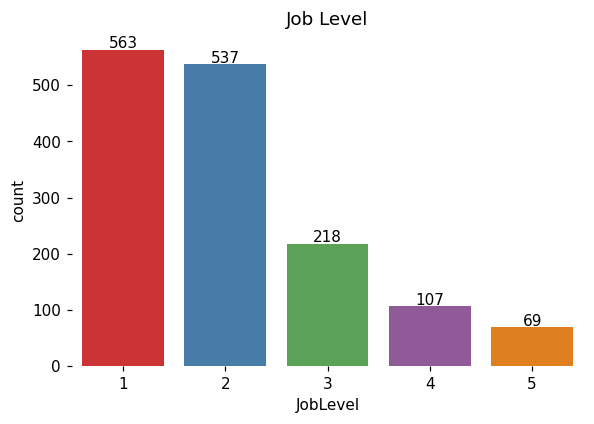

In [781]:
plt = sns.countplot( data=data, x="JobLevel", palette="Set1")
plt.set_title("Job Level")
#Show total number of observations for each category
for p in plt.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
    
# delete axis lines
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

    
    

### JobRole

In [782]:
# JobRole
data['JobRole'].describe()

count                1494
unique                 11
top       Sales Executive
freq                  327
Name: JobRole, dtype: object

In [783]:
data['JobRole'].value_counts()

Sales Executive              327
Research Scientist           299
Lab Tech                     150
Manufacturing Director       143
Healthcare Representative    134
Laboratory Technician        122
Manager                      102
Sales Representative          86
Research Director             79
Human Resources               35
RH                            17
Name: JobRole, dtype: int64

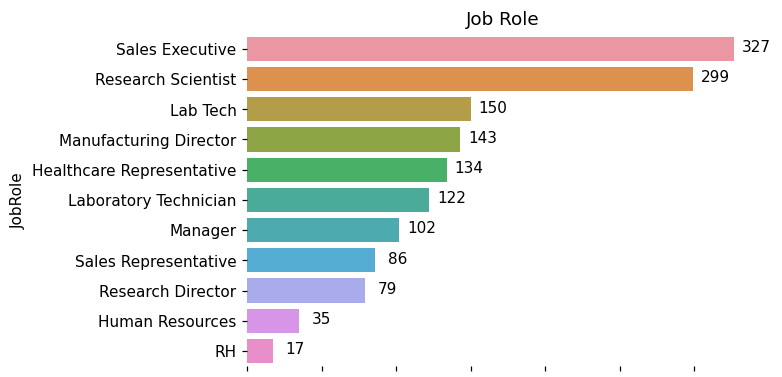

In [784]:
# Horizontal bars for JobRole
plt = sns.countplot( data=data, y="JobRole",  order=data['JobRole'].value_counts().index)
plt.set_title("Job Role")
#Show total number of observations for each category
for p in plt.patches:
    width = p.get_width()
    plt.text(width +15,
             p.get_y()+p.get_height()/2. + 0.1,
            '{:1.0f}'.format(width),
            ha="center")
    
# Delete axis labels
plt.set_xlabel("")
plt.set_xticklabels("")

# delete axis lines
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

    

### MariatalStatus

In [785]:
# MariatalStatus
data['MaritalStatus'].describe()

count        1494
unique          6
top       Married
freq          660
Name: MaritalStatus, dtype: object

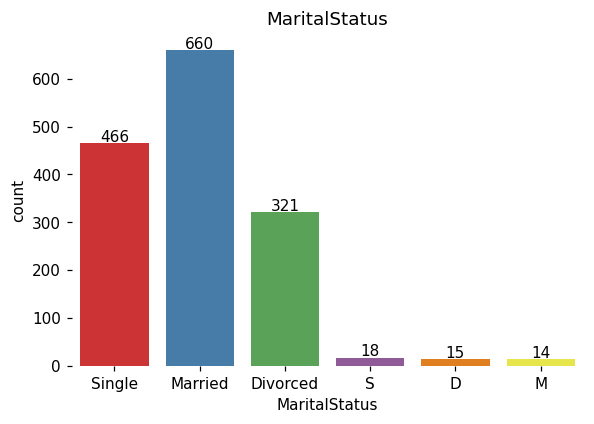

In [786]:
plt = sns.countplot( data=data, x="MaritalStatus", palette="Set1")
plt.set_title("MaritalStatus")
#Show total number of observations for each category
for p in plt.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
    
# delete axis lines
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

    
    

In [787]:
data["MaritalStatus"] = data["MaritalStatus"].replace("S", "Single")
data["MaritalStatus"] = data["MaritalStatus"].replace("D", "Married")
data["MaritalStatus"] = data["MaritalStatus"].replace("M", "Divorced")

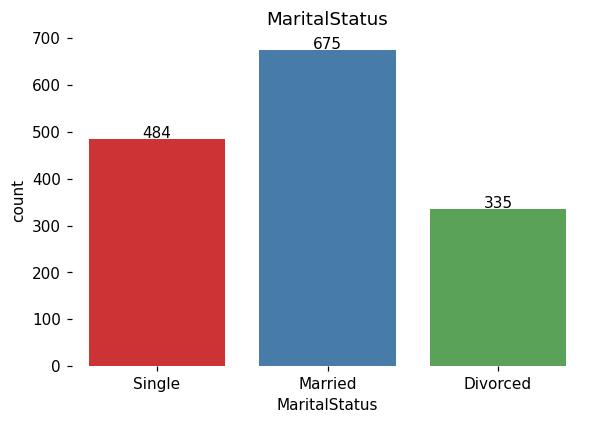

In [788]:
plt = sns.countplot( data=data, x="MaritalStatus", palette="Set1")
plt.set_title("MaritalStatus")
#Show total number of observations for each category
for p in plt.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
    
# delete axis lines
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

    
    

### MonthlyIncome

In [789]:
# MonthlyIncome
data['MonthlyIncome'].describe()

count    1.494000e+03
mean     1.306216e+04
std      2.561873e+05
min      2.500000e+01
25%      2.868000e+03
50%      4.872500e+03
75%      8.233750e+03
max      9.907000e+06
Name: MonthlyIncome, dtype: float64

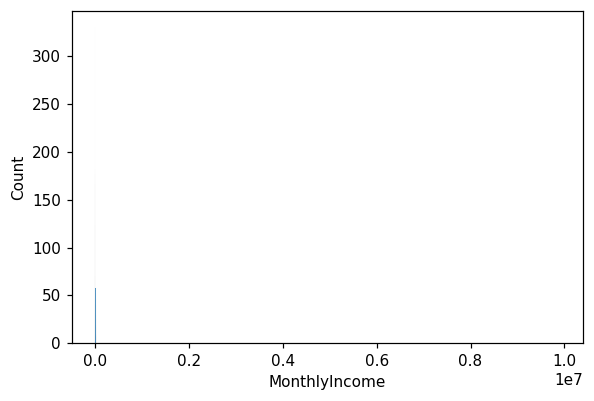

In [790]:
# Histogram of MonthlyIncome
sns.histplot(data=data, x="MonthlyIncome");

In [791]:
sum(data['MonthlyIncome'].unique())

18856294

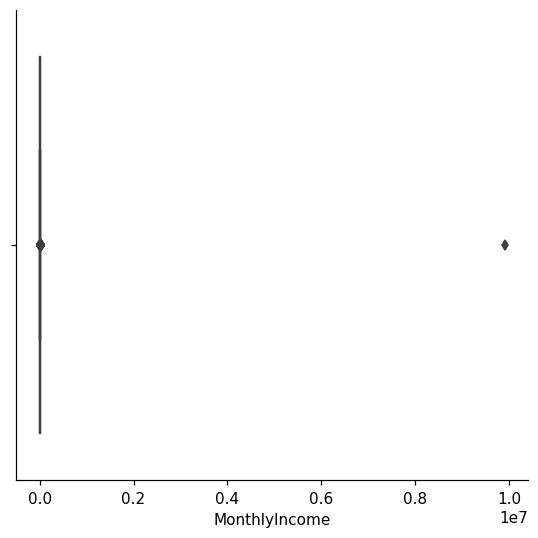

In [792]:
# Boxplot of MonthlyIncome
sns.catplot(x="MonthlyIncome", kind="box", data=data);

Se determina que los valores atípicos es un error de digitación, por lo que se propone:

*   Interpretar los valores atípicos como un problema de digitación, por lo cual 140 se reemplaza con 40, 160 por 60 y 180 por 80

In [793]:
# count atipical values
data.loc[data['MonthlyIncome'] > 15000, 'MonthlyIncome'].count()

134

In [794]:
# show top 10 highest values
data['MonthlyIncome'].sort_values(ascending=False).head(10)

1326    9907000
190       19999
746       19973
851       19943
165       19926
568       19859
918       19847
749       19845
1242      19833
898       19740
Name: MonthlyIncome, dtype: int64

In [795]:
# show top 10 lowest values
data['MonthlyIncome'].sort_values(ascending=True).head(10)


72        25
974       50
513     1009
727     1051
764     1052
1338    1081
1365    1091
177     1102
911     1118
1402    1129
Name: MonthlyIncome, dtype: int64

In [796]:
# if MonthlyIncome is out of range, divide by 1000
data.loc[data['MonthlyIncome'] > 20000, 'MonthlyIncome'] = data['MonthlyIncome'] / 1000

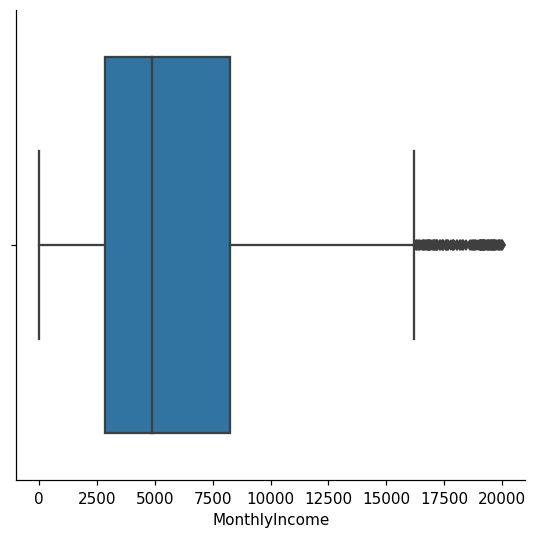

In [797]:
sns.catplot(x="MonthlyIncome", kind="box", data=data);

In [798]:
# if MonthlyIncome is out of range, substract by 1000
data.loc[data['MonthlyIncome'] > 12000, 'MonthlyIncome'] = data['MonthlyIncome'] - 10000


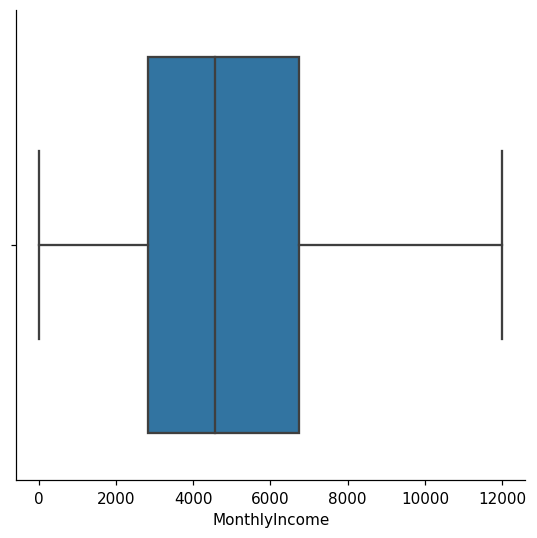

In [799]:
sns.catplot(x="MonthlyIncome", kind="box", data=data);


### MonthlyRate

In [800]:
# MonthlyRate
data['MonthlyRate'].describe()

count     1494.000000
mean     14266.288487
std       7104.235834
min       2094.000000
25%       8047.000000
50%      14199.000000
75%      20413.000000
max      26999.000000
Name: MonthlyRate, dtype: float64

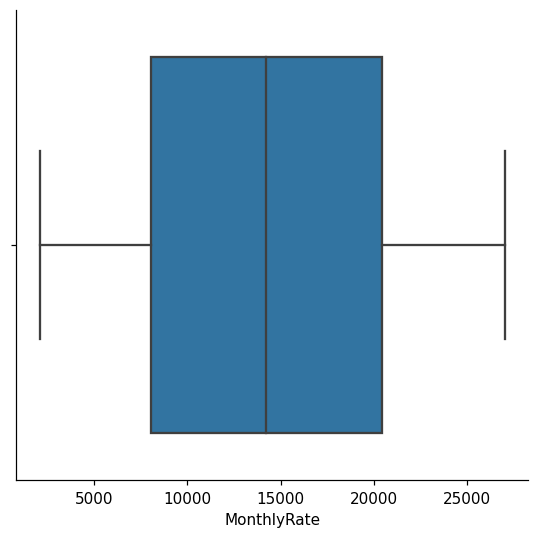

In [801]:

sns.catplot(x="MonthlyRate", kind="box", data=data);

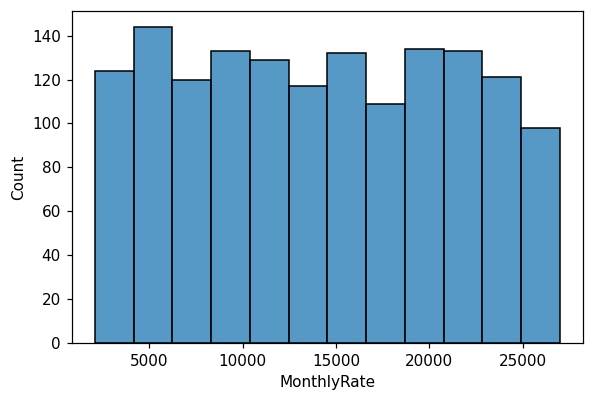

In [802]:
sns.histplot(data=data, x="MonthlyRate");

### NumCompaniesWorked

In [803]:
# NumCompaniesWorked
data['NumCompaniesWorked'].describe()

count    1494.000000
mean        2.684739
std         2.486738
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

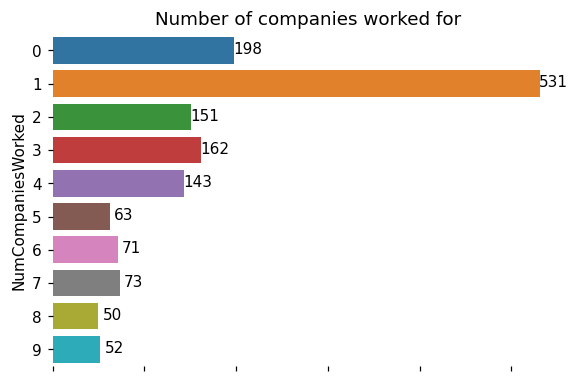

In [804]:
# Horizontal bars for JobRole
plt = sns.countplot( data=data, y="NumCompaniesWorked")
plt.set_title("Number of companies worked for")
#Show total number of observations for each category
for p in plt.patches:
    width = p.get_width()
    plt.text(width +15,
             p.get_y()+p.get_height()/2. + 0.1,
            '{:1.0f}'.format(width),
            ha="center")
    
# Delete axis labels
plt.set_xlabel("")
plt.set_xticklabels("")

# delete axis lines
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

    

### Over18

In [805]:
# Over18
data['Over18'].describe()

count     1494
unique       1
top          Y
freq      1494
Name: Over18, dtype: object

Se determina que todos los registros son de personas mayores de 18 años, por lo que se propone eliminar la columna.

### OverTime

In [806]:
# OverTime
data['OverTime'].describe()

count     1494
unique       3
top         No
freq       933
Name: OverTime, dtype: object

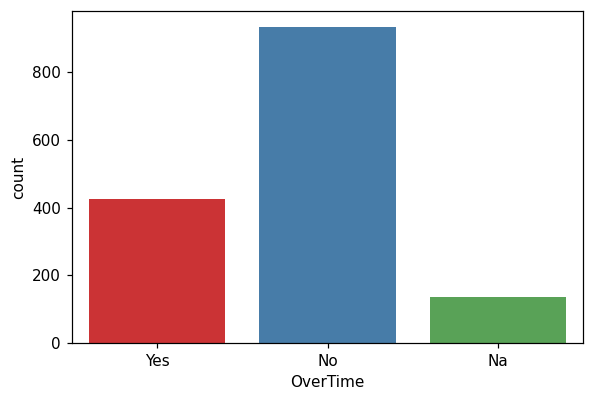

In [807]:
sns.countplot( data=data, x="OverTime", palette="Set1")

In [808]:
data["OverTime"] = data["OverTime"].replace("Na", "No")


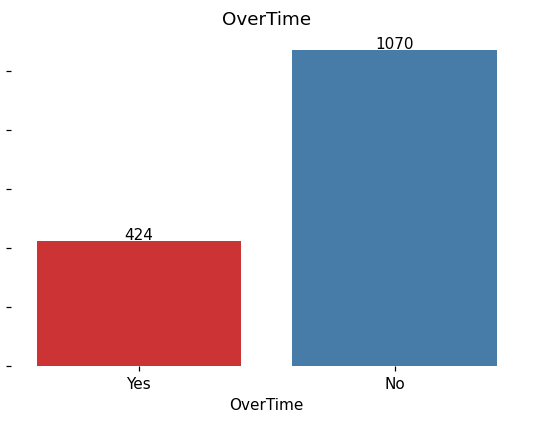

In [809]:
# SNS Barplot of data[Gender]
plt = sns.countplot( data=data, x="OverTime", palette="Set1")
plt.set_title("OverTime")
#Show total number of observations for each category
for p in plt.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
    
# Delete axis labels
plt.set_ylabel("")
plt.set_yticklabels("")

# delete axis lines
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

### PercentSalaryHike

In [810]:
# PercentSalaryHike
data['PercentSalaryHike'].describe()

count    1494.000000
mean       15.191432
std         3.661063
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

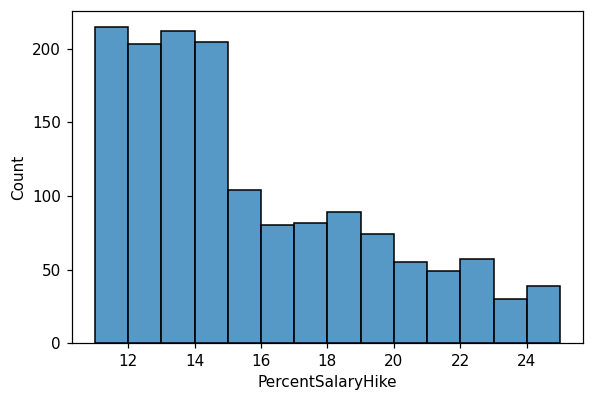

In [811]:
sns.histplot(data=data, x="PercentSalaryHike");

### PerformanceRating

In [812]:
# PerformanceRating
data['PerformanceRating'].describe()

count    1494.000000
mean        3.153949
std         0.361021
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

In [813]:
data['PerformanceRating'].value_counts()

3    1264
4     230
Name: PerformanceRating, dtype: int64

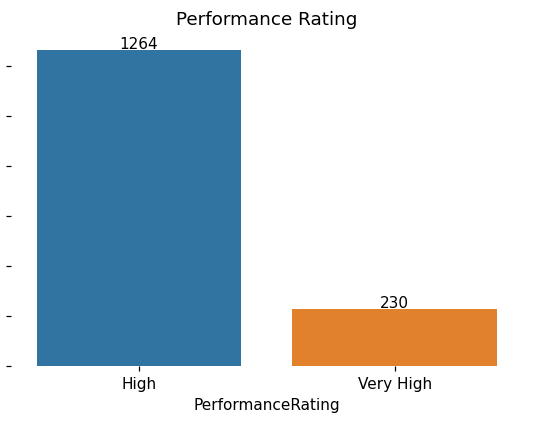

In [814]:
plt = sns.countplot(data=data, x="PerformanceRating");
plt.set_title("Performance Rating")
#Show total number of observations for each category
for p in plt.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
    
# Delete axis labels
plt.set_ylabel("")
plt.set_yticklabels("")

# delete axis lines
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

labels = ['High', 'Very High']
plt.set_xticklabels(labels);

No se encuentran problemas de calidad de datos.

###RelationshipSatisfaction

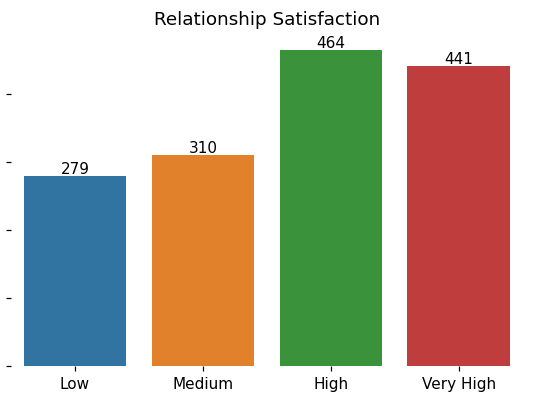

In [815]:
#RelationshipSatisfaction
plt = sns.countplot(data = data, x= "RelationshipSatisfaction")
plt.set(xlabel=None)
plt.set_title("Relationship Satisfaction")
#Show total number of observations for each category
for p in plt.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
    
# delete axis lines
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

# Delete axis labels
plt.set_ylabel("")
plt.set_yticklabels("")

labels = ['Low', 'Medium', 'High', 'Very High']
plt.set_xticklabels(labels);

###StockOptionLevel

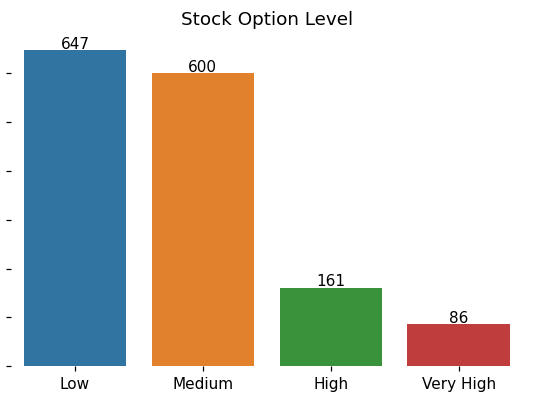

In [816]:
#StockOptionLevel
plt = sns.countplot(data = data, x= "StockOptionLevel")
plt.set(xlabel=None)
plt.set_title("Stock Option Level")
#Show total number of observations for each category
for p in plt.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
    
# delete axis lines
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

# Delete axis labels
plt.set_ylabel("")
plt.set_yticklabels("")

labels = ['Low', 'Medium', 'High', 'Very High']
plt.set_xticklabels(labels);

###TotalWorkingYears

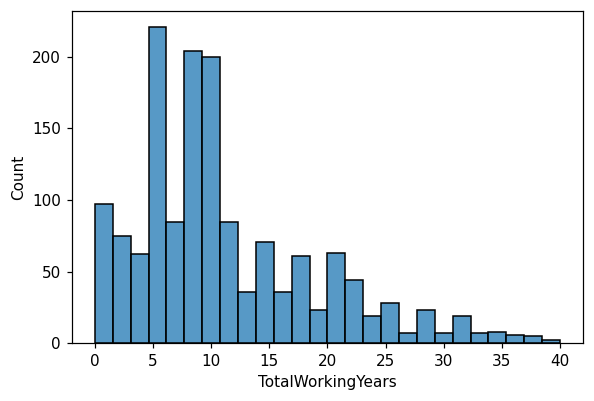

In [817]:
#TotalWorkingYears
hist = sns.histplot(data = data, x= "TotalWorkingYears")

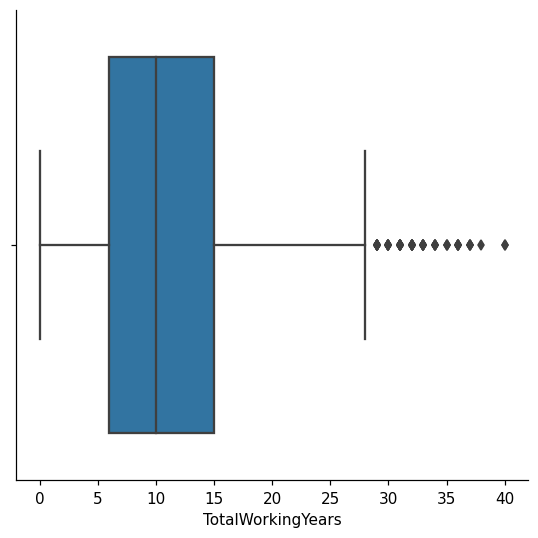

In [818]:
box = sns.catplot(data = data, x= "TotalWorkingYears", kind='box')

Para determinar si los valore atipicos tienen sentido, se realiza un filtro para verificar que la edad de estos trabajadores sea mayor a 48 años para validar que los años trabajados correspondan con la edad minima de empleabilidad (18)

In [819]:
data[ (data['TotalWorkingYears'] > 30) ]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
18,4.0,53.0,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,...,80.0,0,31,3,3,25,8,3,7,0
85,4.0,56.0,No,Travel_Rarely,1400,Research & Development,7,3,Life Sciences,1,...,80.0,0,37,3,2,6,4,0,2,0
98,3.0,58.0,No,Travel_Rarely,682,Sales,10,4,Medical,1,...,80.0,0,38,1,2,37,10,1,8,0
126,4.0,58.0,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,1,...,80.0,1,40,3,2,40,10,15,6,0
187,2.0,55.0,No,Travel_Rarely,692,Research & Development,14,4,Medical,1,...,80.0,0,36,3,3,24,15,2,15,0
190,3.0,52.0,No,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,...,80.0,1,34,5,3,33,18,11,9,0
233,4.0,50.0,No,Travel_Rarely,854,Sales,1,4,Medical,1,...,80.0,1,32,3,2,7,0,0,6,0
237,3.0,52.0,No,Non-Travel,771,Sales,2,4,Life Sciences,1,...,80.0,0,33,2,4,33,7,15,12,0
270,1.0,55.0,No,Travel_Rarely,452,Research & Development,1,3,Medical,1,...,80.0,0,37,2,3,36,10,4,13,0
401,1.0,56.0,No,Travel_Frequently,906,Sales,6,3,Life Sciences,1,...,80.0,3,36,0,2,7,7,7,7,0


###TrainingTimesLastYear


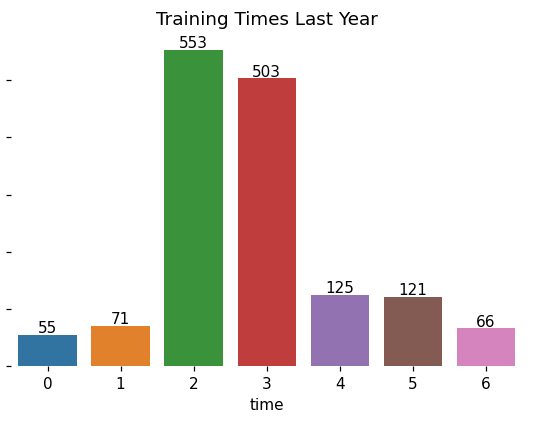

In [820]:
#TrainingTimesLastYear
plt = sns.countplot(data = data, x= "TrainingTimesLastYear")

plt.set(xlabel='time')
plt.set_title("Training Times Last Year")
#Show total number of observations for each category
for p in plt.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
    
# delete axis lines
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

# Delete axis labels
plt.set_ylabel("")
plt.set_yticklabels("");

###WorkLifeBalance

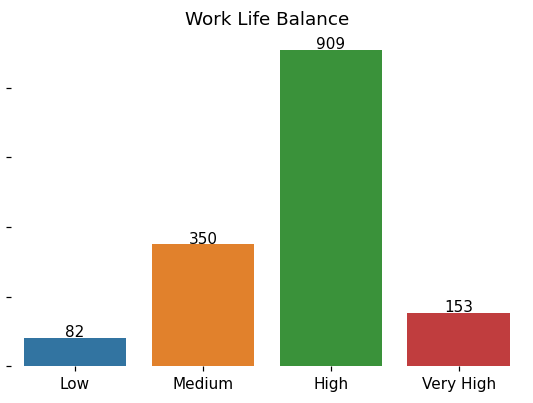

In [821]:
#WorkLifeBalance
plt = sns.countplot(data = data, x= "WorkLifeBalance")

plt.set(xlabel=None)
plt.set_title("Work Life Balance")
#Show total number of observations for each category
for p in plt.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
    
# delete axis lines
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

# Delete axis labels
plt.set_ylabel("")
plt.set_yticklabels("")

labels = ['Low', 'Medium', 'High', 'Very High']
plt.set_xticklabels(labels);

###YearsInCurrentRole

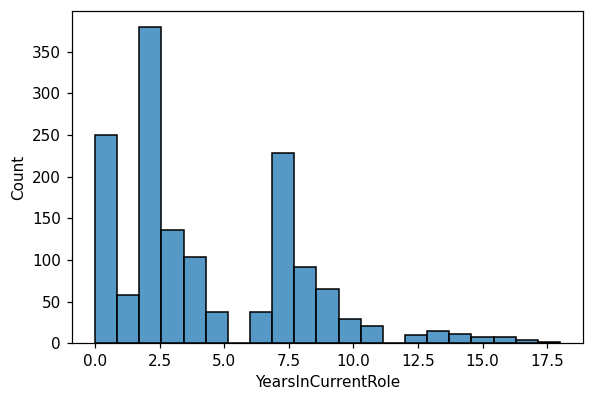

In [822]:
#YearsInCurrentRole
hist = sns.histplot(data = data, x= "YearsInCurrentRole")

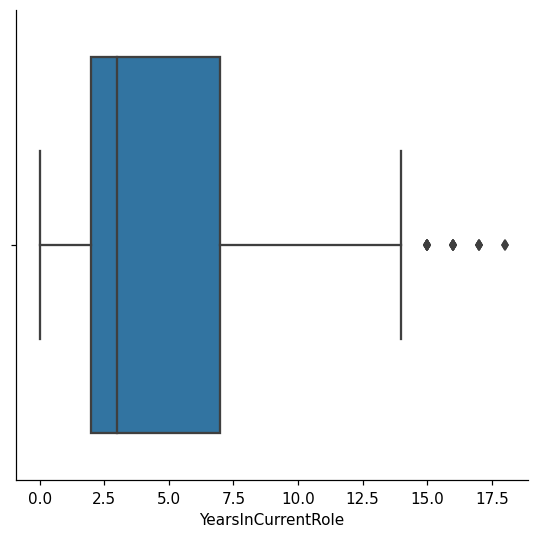

In [823]:
box = sns.catplot(data = data, x= "YearsInCurrentRole", kind='box')

###YearsSinceLastPromotion


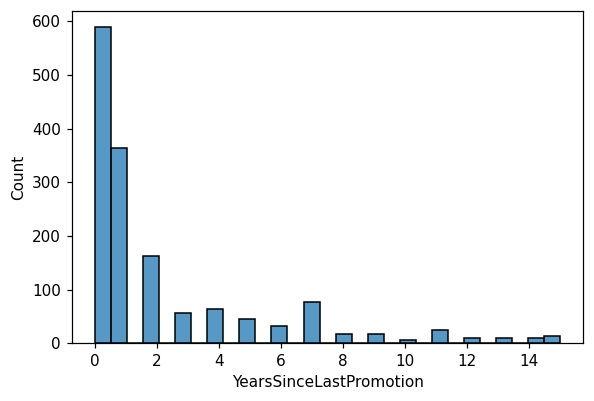

In [824]:
#YearsSinceLastPromotion
hist = sns.histplot(data = data, x= "YearsSinceLastPromotion")

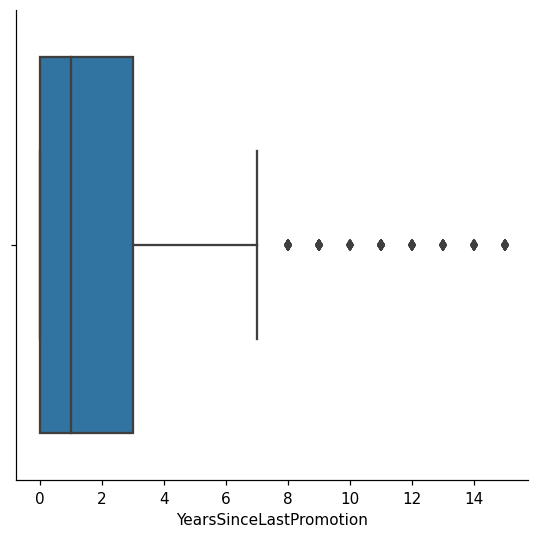

In [825]:
count = sns.catplot(data = data, x= "YearsSinceLastPromotion", kind='box')

###YearsWithCurrManager

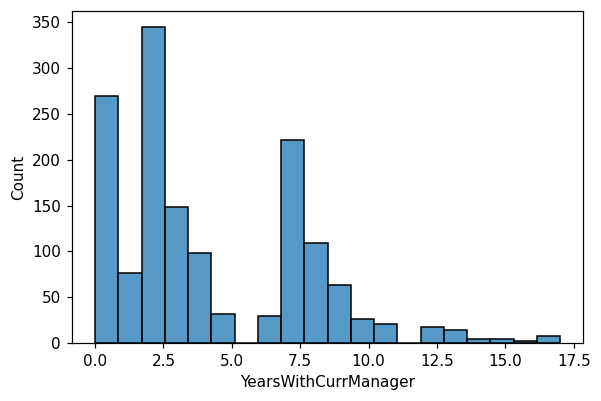

In [826]:
#YearsWithCurrManager
hist = sns.histplot(data = data, x= "YearsWithCurrManager")

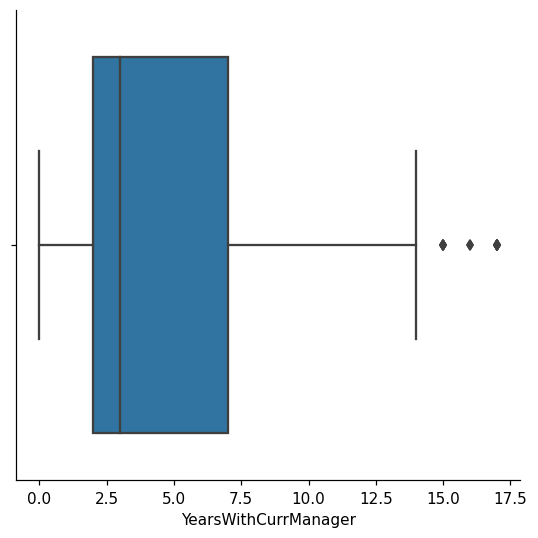

In [827]:
count = sns.catplot(data = data, x= "YearsWithCurrManager", kind='box')

###Revisión datos duplicados

Se revisa si existen datos duplicados:

In [828]:
data[data.duplicated()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee


#**Análisis exploratorio de datos y selección de features**

Dentro de la sección de entendimiento (b. Limpieza y preparación de datos.) se realizó el análisis univariado.  Ahora se presentarán los multivariados.

## Análisis bivariado de las relaciones más importantes.

Primero se revisa la matriz de correlación de las columnas:

In [829]:
#valores de correlación entre los datos
data.corr()

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
JobSatisfaction,1.000000,-0.006662,0.033041,-0.000678,-0.010619,NaN,-0.027914,-0.009773,-0.066909,-0.014026,...,NaN,0.001223,-0.021613,0.001689,-0.022694,0.007356,-0.003484,-0.017950,-0.024450,NaN
Age,-0.006662,1.000000,0.015407,-0.017311,0.201819,NaN,-0.020522,0.005908,0.018335,0.025686,...,NaN,0.040601,0.677996,-0.022187,-0.015525,0.291108,0.218466,0.219617,0.204804,NaN
DailyRate,0.033041,0.015407,1.000000,-0.001937,-0.020092,NaN,-0.041881,0.024917,0.028211,0.037402,...,NaN,0.042150,0.013335,-0.000848,-0.043343,-0.021913,0.009090,-0.035123,-0.033456,NaN
DistanceFromHome,-0.000678,-0.017311,-0.001937,1.000000,0.005601,NaN,0.040992,-0.013389,0.023198,0.001217,...,NaN,0.049665,-0.006519,-0.038545,-0.026106,-0.005086,0.014514,0.004695,0.012686,NaN
Education,-0.010619,0.201819,-0.020092,0.005601,1.000000,NaN,0.033263,-0.018804,0.010358,0.031655,...,NaN,0.013622,0.150403,-0.025955,0.021927,0.087151,0.064206,0.052343,0.071668,NaN
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.027914,-0.020522,-0.041881,0.040992,0.033263,NaN,1.000000,0.026454,0.040029,-0.008084,...,NaN,0.053489,-0.030134,0.021052,0.002244,-0.021844,-0.013854,-0.014968,-0.011189,NaN
EnvironmentSatisfaction,-0.009773,0.005908,0.024917,-0.013389,-0.018804,NaN,0.026454,1.000000,-0.052614,-0.001455,...,NaN,0.005551,-0.001819,-0.013416,0.033973,-0.005490,0.022953,0.016657,-0.004657,NaN
HourlyRate,-0.066909,0.018335,0.028211,0.023198,0.010358,NaN,0.040029,-0.052614,1.000000,0.043138,...,NaN,0.054698,-0.011027,-0.007612,-0.006353,-0.036853,-0.032512,-0.029251,-0.030354,NaN
JobInvolvement,-0.014026,0.025686,0.037402,0.001217,0.031655,NaN,-0.008084,-0.001455,0.043138,1.000000,...,NaN,0.026093,-0.012133,-0.012279,-0.022263,-0.023925,0.004950,-0.029832,0.018113,NaN


Respecto a los valores de las correlaciones en el caso de EmployeeCount y StandardHours no se tienen en cuenta, ya que como se vió anteriormente los valores son constantes, por lo cual se puede pensar en no usar éstas columnas para el modelo.

In [830]:
#Revisar valores de correlación respecto a la variable objetivo JobSatisfaction:
pd.DataFrame(data=data.corr())['JobSatisfaction'].abs().sort_values(ascending=False)

JobSatisfaction             1.000000
HourlyRate                  0.066909
NumCompaniesWorked          0.056671
DailyRate                   0.033041
EmployeeNumber              0.027914
YearsWithCurrManager        0.024450
WorkLifeBalance             0.022694
TotalWorkingYears           0.021613
YearsSinceLastPromotion     0.017950
JobInvolvement              0.014026
PercentSalaryHike           0.012828
Education                   0.010619
MonthlyIncome               0.009987
EnvironmentSatisfaction     0.009773
MonthlyRate                 0.008019
YearsAtCompany              0.007356
Age                         0.006662
RelationshipSatisfaction    0.006297
JobLevel                    0.004167
PerformanceRating           0.003696
YearsInCurrentRole          0.003484
TrainingTimesLastYear       0.001689
StockOptionLevel            0.001223
DistanceFromHome            0.000678
EmployeeCount                    NaN
StandardHours                    NaN
NewEmployee                      NaN
N

No se ven valores muy altos (absolutos) respecto a la correlación entre la variable objetivo JobSatisfaction y las demás columnas, las más altas que se encontraron fueron: HourlyRate, NumCompaniesWorked y DailyRate                   

## Selección de features

De la etapa de exploración de datos se pudo encontar columnas con valores constantes, por lo que se propone omitarlas:EmployeeCount, StandardHours y Over18.

También está el caso de la columna 'EmployeeNumber' la cual es un identificador único por empleado y por lo cual no tiene efecto sobre el modelo. Por lo cual también se omite esta columna.

In [831]:
# Drop column EmployeeCount
data = data.drop(['EmployeeCount'], axis=1)

# Drop column StandardHours
data = data.drop(['StandardHours'], axis=1)

# Drop column Over18
data = data.drop(['Over18'], axis=1)

In [832]:
# Drop column EmployeeNumber
data = data.drop(['EmployeeNumber'], axis=1)

## Preguntas:

### ¿Qué variables impactan en mayor nivel la satisfacción de los empleados?

###¿Qué variables parecen no ser relevantes para el análisis?

#Modelamiento

##Transformación de columnas categóricas.

In [833]:
data.head()

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,1,10,3,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,0,7,3,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,0,8,3,3,8,7,3,0,0
4,2.0,36.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,1,6,3,3,2,2,2,2,0


In [834]:
# one hot enconding 
data = pd.get_dummies(data, columns=["OverTime", "Attrition","Gender", "BusinessTravel","Department","EducationField","JobRole","MaritalStatus"], drop_first=True)

In [835]:
print(data.shape)
data.columns.values

(1494, 49)


array(['JobSatisfaction', 'Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'NewEmployee', 'OverTime_Yes',
       'Attrition_Yes', 'Gender_Male', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Med', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Lab Tech',
       'JobRole_Laboratory Technician', 'JobRole_M

##Separación conjuntos datos entrenamiento, validación y prueba

Dado que solo se tienen 1494 registros, se separan los datos en 80% de entrenamiento y 20% para prueba:

In [836]:
train, test = train_test_split(data, test_size=0.2, random_state=33)
train.head()

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_RH,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
932,3.0,29.0,806,7,3,2,39,3,1,3339.0,...,0,0,0,0,0,0,0,0,0,0
788,3.0,28.0,857,10,3,3,59,3,2,3660.0,...,0,0,0,0,0,1,0,0,0,1
150,2.0,40.0,1395,26,3,2,54,3,2,5605.0,...,0,0,0,0,0,1,0,0,0,0
1401,2.0,55.0,189,26,4,3,71,4,5,9636.0,...,0,1,0,0,0,0,0,0,1,0
174,1.0,45.0,1268,4,2,3,30,3,2,5006.0,...,0,0,0,0,0,0,1,0,0,0


In [837]:
#separando la variable objetivo:
x_train = train.drop('JobSatisfaction',axis=1)
y_train = train['JobSatisfaction']

#separando la variable objetivo:
x_test = test.drop('JobSatisfaction',axis=1)
y_test = test['JobSatisfaction']

x_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_RH,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
932,29.0,806,7,3,2,39,3,1,3339.0,17285,...,0,0,0,0,0,0,0,0,0,0
788,28.0,857,10,3,3,59,3,2,3660.0,7909,...,0,0,0,0,0,1,0,0,0,1
150,40.0,1395,26,3,2,54,3,2,5605.0,8504,...,0,0,0,0,0,1,0,0,0,0
1401,55.0,189,26,4,3,71,4,5,9636.0,25811,...,0,1,0,0,0,0,0,0,1,0
174,45.0,1268,4,2,3,30,3,2,5006.0,6319,...,0,0,0,0,0,0,1,0,0,0


In [842]:
print("Tamaño del conjunto de datos de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de datos de prueba:", x_test.shape)

x_train.info()

Tamaño del conjunto de datos de entrenamiento: (1195, 48)
Tamaño del conjunto de datos de prueba: (299, 48)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 932 to 1054
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1195 non-null   float64
 1   DailyRate                          1195 non-null   int64  
 2   DistanceFromHome                   1195 non-null   int64  
 3   Education                          1195 non-null   int64  
 4   EnvironmentSatisfaction            1195 non-null   int64  
 5   HourlyRate                         1195 non-null   int64  
 6   JobInvolvement                     1195 non-null   int64  
 7   JobLevel                           1195 non-null   int64  
 8   MonthlyIncome                      1195 non-null   float64
 9   MonthlyRate                        1195 non-null   int64  
 10  NumCompani

## Modelo 1: Regresión Logística

La regresión logística requiere realizar normalización de los datos:

### Modelo 1: Evaluación

### Modelo 1: Búsqueda hiperparámetros

### Modelo 1: Evalución datos de validación